<a href="https://colab.research.google.com/github/SantoshAhirrao/Enron/blob/master/Enron_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Colab Preparation

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id':'1kspwcO88yCvb_dXNnRGfhw36_4FCMCiB'}) # replace the id with id of file you want to access
downloaded.GetContentFile('email_df.csv') 

In [6]:
import os

os.chdir("/content/")

# os.chdir("./content/drive/My Drive/Colab Notebooks") # Advisable to have such path

Jupyter Notebook

Import Libs

In [7]:
import re
import os, sys, email
import numpy as np 
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('whitegrid')
#import plotly
#plotly.offline.init_notebook_mode()
#import plotly.graph_objs as go
import wordcloud

# Network analysis
import networkx as nx

# NLP
from nltk.tokenize.regexp import RegexpTokenizer

from subprocess import check_output


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
pd.set_option('display.max_columns', None)   # To see all the columns of data frame

### 1. Loading and cleaning data

In [12]:
import pandas as pd
import numpy as np
import nltk
from gensim import corpora
from functools import reduce
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import re
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()
stop = set(stopwords.words('english'))
stop.update(("to","cc","subject","http","from","sent","hou", "ect"))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib.cm as cm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
df = pd.read_csv("/content/email_df.csv")

In [11]:
df.head(2)

,Unnamed: 0,file,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user
0,1232,allen-p/deleted_items/1.,<21543395.1075855374340.JavaMail.evans@thyme>,2001-12-30 18:19:42+00:00,frozenset({'pallen70@hotmail.com'}),frozenset({'pallen@enron.com'}),Fwd: Bishops Corner,1.0,text/plain; charset=ANSI_X3.4-1968,7bit,"""phillip allen"" <pallen70@hotmail.com>@ENRON",pallen@enron.com,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Del...",Allen-P,pallen (Non-Privileged).pst,"\n \n>From: ""Greg Thorse"" \n>To: \n>CC: ""Phill...",allen-p
1,1233,allen-p/deleted_items/10.,<25363451.1075855374674.JavaMail.evans@thyme>,2001-12-28 01:16:46+00:00,frozenset({'arsystem@mailman.enron.com'}),frozenset({'k..allen@enron.com'}),Your Approval is Overdue: Access Request for m...,1.0,text/plain; charset=us-ascii,7bit,ARSystem <ARSystem@mailman.enron.com>@ENRON,"Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...",NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Del...",Allen-P,pallen (Non-Privileged).pst,This request has been pending your approval fo...,allen-p


# Vectorize the data

In [14]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 500,
    stop_words = stop
)
tfidf.fit(df['content'].dropna())
text = tfidf.transform(df['content'].dropna())

# Hyperparameter tuning for optimal number of clusters¶

In [16]:
max_k=32
data=text
iters = range(4, max_k+1, 2)

sse = []
for k in iters:
    sse_val = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_
    sse.append(sse_val)
    print('Fit {} clusters, sse {}'.format(k,sse_val))

Fit 4 clusters, sse 47789.459092252466
Fit 6 clusters, sse 46199.97285044818
Fit 8 clusters, sse 45353.04446589117
Fit 10 clusters, sse 44672.98420485889
Fit 12 clusters, sse 43876.29836624063
Fit 14 clusters, sse 43686.545986041514
Fit 16 clusters, sse 42366.184433537885
Fit 18 clusters, sse 41890.569005734615
Fit 20 clusters, sse 41656.62202427187
Fit 22 clusters, sse 41498.1650032652
Fit 24 clusters, sse 40938.06425179904
Fit 26 clusters, sse 40807.0063957476
Fit 28 clusters, sse 40898.42123675426
Fit 30 clusters, sse 39483.92096970206
Fit 32 clusters, sse 39546.43334392076


# Plot SSE vs number of clusters

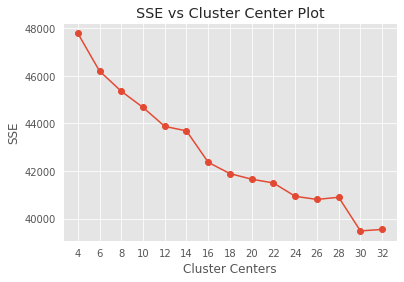

In [19]:

plt.style.use("ggplot")
f, ax = plt.subplots(1, 1)
ax.plot(iters, sse, marker='o')
ax.set_xlabel('Cluster Centers')
ax.set_xticks(iters)
ax.set_xticklabels(iters)
ax.set_ylabel('SSE')
ax.set_title('SSE vs Cluster Center Plot')
plt.savefig('/content/Clustering-SSE.png')
plt.show()

# Model for optimal number of clusters

In [22]:
clusters = MiniBatchKMeans(n_clusters=24, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

# Print clusters with top terms

In [25]:
labels=tfidf.get_feature_names()
n_terms=10

new_df = pd.DataFrame(data.todense())
new_df['clusters'] = clusters
# new_df.to_csv('/content/clusters.csv')

In [26]:
clusters_mean = new_df.groupby(['clusters']).mean()

In [27]:
clusters_mean.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.006412,0.005129,0.010841,0.005222,0.001824,0.001459,0.001847,0.001541,0.001937,0.002867,0.010410,0.004335,0.010080,0.012228,0.003768,0.004575,0.007426,0.004000,0.004828,0.005460,0.003846,0.010580,0.002486,0.011967,0.011880,0.004834,0.003400,0.003595,0.005101,0.005952,0.004578,0.004374,0.004262,0.003700,0.010925,0.005168,0.002032,0.001951,0.003233,0.003434,0.006233,0.002564,0.007843,0.003417,0.005626,0.002397,0.003280,0.002120,0.010590,0.011657,0.008568,0.002678,0.002629,0.005656,0.009314,0.004813,0.000026,0.000121,0.006602,0.018457,0.002685,0.005615,0.000655,0.007562,0.001908,0.003709,0.005382,0.000117,0.008631,0.002434,0.003173,0.010981,0.019733,0.005295,0.005244,0.003814,0.011355,0.000008,0.006541,0.001135,0.008314,0.001186,0.004478,0.002159,0.000424,0.000759,0.001181,0.013567,0.005525,0.004482,0.002647,0.036662,0.002647,0.002662,0.005839,0.007137,0.000004,0.000004,0.005804,0.000323,0.000901,0.008412,0.008425,0.010039,0.001368,0.008573,0.005711,0.004152,0.015453,0.001034,0.004270,0.001401,0.000654,0.017575,0.011398,0.004568,0.004318,0.013099,0.004480,0.007099,0.000203,0.013340,0.001620,0.008120,0.006839,0.006269,0.010616,0.000454,0.002519,0.007347,0.005252,0.017079,0.009102,0.007343,0.005383,0.005212,0.005626,0.002783,0.003390,0.008647,0.009553,0.020244,0.012814,0.000000,0.010483,0.007632,0.004839,0.010666,0.006547,0.001902,0.001482,0.000527,0.010974,0.002405,0.003772,0.002442,0.001195,0.015844,0.007176,0.010867,0.001620,0.007502,0.006660,0.000074,0.016557,0.002864,0.006512,0.003849,0.003708,0.002086,0.005967,0.005196,0.006397,0.004257,0.004228,0.005950,0.004451,0.005

In [28]:
for i,r in clusters_mean.iterrows():
    print('\nCluster {}'.format(i))
    print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))


Cluster 0
time,one,need,let,get,thanks,would,call,please,know

Cluster 1
portland,date,scheduling,iso,messages,start,final,hour,hourahead,schedules

Cluster 2
link,news,research,email,asp,click,pdf,html,www,com

Cluster 3
message,call,2002,conference,thanks,30,january,00,please,meeting

Cluster 4
stock,center,com,unknown,company,alias,database,employees,dbcaps97data,enron

Cluster 5
need,com,services,attached,michael,enron,call,please,713,office

Cluster 6
stock,million,funds,energy,california,made,company,consumers,employees,enron

Cluster 7
20,contract,2002,power,capacity,02,ena,energy,000,gas

Cluster 8
new,special,unsubscribe,receive,email,free,com,click,09,image

Cluster 9
face,arial,href,align,size,width,tr,br,td,font

Cluster 10
enron,10,11,06,january,time,30,2002,pm,00

Cluster 11
may,message,use,contract,mail,corp,com,enron,intended,recipient

Cluster 12
click,market,800,00,com,20,energy,us,image,09

Cluster 13
review,name,type,corp,asp,page,com,enron,id,request

Cluster 14
p

In [ ]:
import gensim

In [ ]:
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
# spacy for lemmatization
import spacy

In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 4.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=024102d613d8d8a7780642400877321c7c8dc34383bfde59fd73f08575d208f9
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
# for plotting
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# prep NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','start','Start', 'Fwd','enron', 'report', 'test','time','email','ub','fw','ubs','ubsw','food','fwd' ])

In [ ]:
print(df.iloc[2]['Subject']) # displays info below

A hard act to follow: the future for energy without Enron


In [ ]:
# Convert email body to list
data = df.Subject.values.tolist()

In [ ]:
# tokenize - break down each sentence into a list of words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [ ]:
data_words = list(sent_to_words(data))

In [ ]:
print(data_words[3])

['please', 'read', 'resolution', 'center', 'to', 'disconnect', 'toll', 'free', 'number']


In [ ]:
from gensim.models.phrases import Phrases, Phraser

In [ ]:
# Build the bigram and trigram models
bigram = Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = Phrases(bigram[data_words], threshold=100)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

In [ ]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[200]]])

['metro_bus_passes', 'and', 'woodlands_express_passes_available', 'effective_friday', 'december']


In [ ]:
# remove stop_words, make bigrams and lemmatize
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [ ]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
print(data_lemmatized[20])

['delivery', 'notification', 'confirm']


In [ ]:
# create dictionary and corpus both are needed for (LDA) topic modeling

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
#!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

In [ ]:
#!unzip mallet-2.0.8.zip

In [ ]:
mallet_path = './mallet-2.0.8/bin/mallet'

In [ ]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# topic modeling
# corpus, dictionary and number of topics required for LDA
# alpha and eta are hyperparameters that affect sparsity of the topics
# chunksize is the number of documents to be used in each training chunk
# update_every determines how often the model parameters should be updated
# passes is the total number of training passes
# Print the Keyword in the 10 topics

In [ ]:
print(lda_model.print_topics())# The weights reflect how important a keyword is to that topic.

[(0, '0.136*"book" + 0.069*"final" + 0.068*"day" + 0.055*"sale" + 0.045*"office" + 0.037*"interest" + 0.028*"group" + 0.020*"updated" + 0.019*"ca" + 0.017*"comparison"'), (1, '0.119*"news" + 0.069*"rigzone_industry" + 0.067*"rate" + 0.049*"business" + 0.039*"offer" + 0.036*"settlement" + 0.035*"volume" + 0.031*"car" + 0.027*"currency" + 0.024*"pipeline"'), (2, '0.062*"urgent" + 0.058*"commodity" + 0.038*"word" + 0.035*"end" + 0.025*"model" + 0.025*"photo" + 0.024*"imbalance" + 0.023*"announcement" + 0.023*"pic" + 0.020*"multiple"'), (3, '0.189*"today" + 0.160*"power" + 0.086*"call" + 0.086*"free" + 0.067*"outage" + 0.047*"enpower" + 0.041*"notice" + 0.024*"team" + 0.017*"landing" + 0.017*"wicked"'), (4, '0.088*"test" + 0.049*"attend" + 0.044*"houstonian_session" + 0.039*"time" + 0.036*"cut" + 0.029*"decline" + 0.029*"email" + 0.029*"internet" + 0.027*"computer" + 0.024*"payment"'), (5, '0.272*"report" + 0.229*"meeting" + 0.064*"document" + 0.047*"expense" + 0.041*"concur_expense" + 0.0

In [ ]:
doc_lda = lda_model[corpus]

In [ ]:
# Model perplexity and topic coherence provide a convenient
# measure to judge how good a given topic model is.
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -8.675523785589416


In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6500739947996486


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook(sort=True)
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

In [ ]:
pyLDAvis.display(vis)

In [ ]:
# now using mallet

In [ ]:
mallet_path = 'mallet-2.0.8/bin/mallet'

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


CalledProcessError: ignored

In [ ]:
# Show Topics
print(ldamallet.show_topics(formatted=False))

NameError: ignored

# Create a Dictionary of Words

In [ ]:
texts = df['Subject'].dropna()
texts = [d.split() for d in texts]
common_dictionary = Dictionary(texts)
common_corpus = [common_dictionary.doc2bow(text) for text in texts]

In [ ]:
print('Number of unique tokens: %d' % len(common_dictionary))
print('Number of documents: %d' % len(common_corpus))

Number of unique tokens: 23258
Number of documents: 53427


In [ ]:
id2word = common_dictionary.id2token
id2word

{}

# Hyperparameters

In [ ]:
num_topics = 11
chunksize = 500 
passes = 20 
eval_every = 1

# Hyperparameter tuning LDA Model

In [ ]:
params = {'chunksize':[1000,2000], 'num_topics' = [5,6,7,8,9,10,11,12,13,14,15], 'decay' : [.5,.6,.7]}

SyntaxError: ignored

In [ ]:
coherence_scores = []
i=1
for chunksize in params['chunksize']:
  for decay in params['decay']:
    for num_topics in params['num_topics']:      
      # print('params: ', chunk_size, decay, num_topics)
      lda_model = LdaModel( corpus=common_corpus,alpha='auto', eta='auto', num_topics=num_topics, decay=decay, chunksize=chunksize)
      coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=common_dictionary, coherence='c_v')
      coherence_lda = coherence_model_lda.get_coherence()
      # print('\nCoherence Score: ', coherence_lda, ' for params: ', chunksize, decay, num_topics)
      coherence_scores.append(coherence_lda)
      lda_model.save('/content/drive/My Drive/ALDA-Submission/'+'lda_model'+str(i)+'.pkl')
      i=i+1

NameError: ignored

In [ ]:
# Read the data into a DataFrame
emails_df = pd.read_csv(r'emails.csv')
print(emails_df.shape)
emails_df.head()

(517401, 2)


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [ ]:
# A single message looks like this
print(emails_df['message'][5])

Message-ID: <30965995.1075863688265.JavaMail.evans@thyme>
Date: Thu, 31 Aug 2000 04:17:00 -0700 (PDT)
From: phillip.allen@enron.com
To: greg.piper@enron.com
Subject: Re: Hello
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Greg Piper
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Greg,

 How about either next Tuesday or Thursday?

Phillip


In [ ]:
emails_df.shape

(517401, 2)

In [ ]:
## Helper functions
def get_text_from_email(msg):
    '''To get the content from email objects'''
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            parts.append( part.get_payload() )
    return ''.join(parts)

def split_email_addresses(line):
    '''To separate multiple email addresses'''
    if line:
        addrs = line.split(',')
        addrs = frozenset(map(lambda x: x.strip(), addrs))
    else:
        addrs = None
    return addrs

In [ ]:
# Parse the emails into a list email objects
messages = list(map(email.message_from_string, emails_df['message']))
emails_df.drop('message', axis=1, inplace=True)

# Get fields from parsed email objects
keys = messages[0].keys()
for key in keys:
    emails_df[key] = [doc[key] for doc in messages]
    
# Parse content from emails
emails_df['content'] = list(map(get_text_from_email, messages))

# Split multiple email addresses
emails_df['From'] = emails_df['From'].map(split_email_addresses)
emails_df['To'] = emails_df['To'].map(split_email_addresses)

# Extract the root of 'file' as 'user'
emails_df['user'] = emails_df['file'].map(lambda x:x.split('/')[0])
del messages
emails_df.head()

,file,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user
0,allen-p/_sent_mail/1.,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",(phillip.allen@enron.com),(tim.belden@enron.com),,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",(phillip.allen@enron.com),(john.lavorato@enron.com),Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",(phillip.allen@enron.com),(leah.arsdall@enron.com),Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p
3,allen-p/_sent_mail/1000.,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",(phillip.allen@enron.com),(randall.gay@enron.com),,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,allen-p/_sent_mail/1001.,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",(phillip.allen@enron.com),(greg.piper@enron.com),Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p


In [ ]:
emails_df.head(1)

,file,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user
0,allen-p/_sent_mail/1.,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",(phillip.allen@enron.com),(tim.belden@enron.com),,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p


Saving it to the processed data

In [ ]:
emails_df.to_csv('processed_data.csv')

In [ ]:
from google.colab import files
files.download('processed_data.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Email Network Analysis

In [ ]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import wordcloud

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


Get the processed file in the colab
downloaded = drive.CreateFile({'id':'1R9vW5dmox7i8OGOoDql_r9yUrvAJgvhD'}) # replace the id with id of file you want to access
downloaded.GetContentFile('resources.csv') 

In [ ]:
emails_df.describe(include='all')

,file,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user
count,517401,517401,517401,517401,495554,517401,517372,517372,517372,517372,517372,517372,517372,517372,517372,517372,517401,517401
unique,517401,517401,224128,20328,54748,159290,1,2,3,27980,73552,33701,132,5335,259,429,249025,150
top,shackleton-s/all_documents/2561.,<4690334.1075860242397.JavaMail.evans@thyme>,"Wed, 27 Jun 2001 16:02:00 -0700 (PDT)",(kay.mann@enron.com),(pete.davis@enron.com),,1.0,text/plain; charset=us-ascii,7bit,Kay Mann,,,,\Kay_Mann_June2001_1\Notes Folders\All documents,Kaminski-V,vkamins.nsf,"As you know, Enron Net Works (ENW) and Enron G...",kaminski-v
freq,1,1,1118,16735,9155,19187,517372,479286,494971,16324,9124,388486,517197,6639,26995,24029,112,28465


In [ ]:
columns = emails_df.columns

for column in columns:
  print("{} - {}".format(column,emails_df[column].nunique()))

file - 517401
Message-ID - 517401
Date - 224128
From - 20328
To - 54748
Subject - 159290
Mime-Version - 1
Content-Type - 2
Content-Transfer-Encoding - 3
X-From - 27980
X-To - 73552
X-cc - 33701
X-bcc - 132
X-Folder - 5335
X-Origin - 259
X-FileName - 429
content - 249025
user - 150


In [ ]:
emails_df.columns


Index(['file', 'Message-ID', 'Date', 'From', 'To', 'Subject', 'Mime-Version',
       'Content-Type', 'Content-Transfer-Encoding', 'X-From', 'X-To', 'X-cc',
       'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName', 'content', 'user'],
      dtype='object')

In [ ]:
emails_df.dtypes

file                         object
Message-ID                   object
Date                         object
From                         object
To                           object
Subject                      object
Mime-Version                 object
Content-Type                 object
Content-Transfer-Encoding    object
X-From                       object
X-To                         object
X-cc                         object
X-bcc                        object
X-Folder                     object
X-Origin                     object
X-FileName                   object
content                      object
user                         object
dtype: object

In [ ]:
emails_df.iloc[0]['To']

frozenset({'tim.belden@enron.com'})


# Defining Cleanup function

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()
stop = set(stopwords.words('english'))
stop.update(("to","cc","subject","http","from","sent","Re", "Fw", "fw","re"))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def clean(document):
  doc1 = document.rstrip()
  doc2 = re.sub(r'[^a-zA-Z]', ' ', doc1)
  doc3 = " ".join([i for i in doc2.lower().split() if i not in stop])
  doc4 = ''.join(ch for ch in doc3 if ch not in exclude)
  doc5 = re.sub(r"\b[a-zA-Z]\b", "", doc4)
  doc6 = " ".join(lemma.lemmatize(word) for word in doc5.split())

  return doc6

In [ ]:
doc = emails_df.iloc[10]['content']

In [ ]:
clean(doc)

'mr buckner delivered gas behind san diego enron energy service appropriate enron entity forwarded request zarin imam ee phone number phillip allen'

Top 10 users

In [ ]:
users = emails_df['user'].unique()

In [ ]:
print("Total count of users: {}".format(len(users)))


Total count of users: 150


In [ ]:
top_users = emails_df.groupby('user').count()['file'].sort_values(ascending=False)[:10]

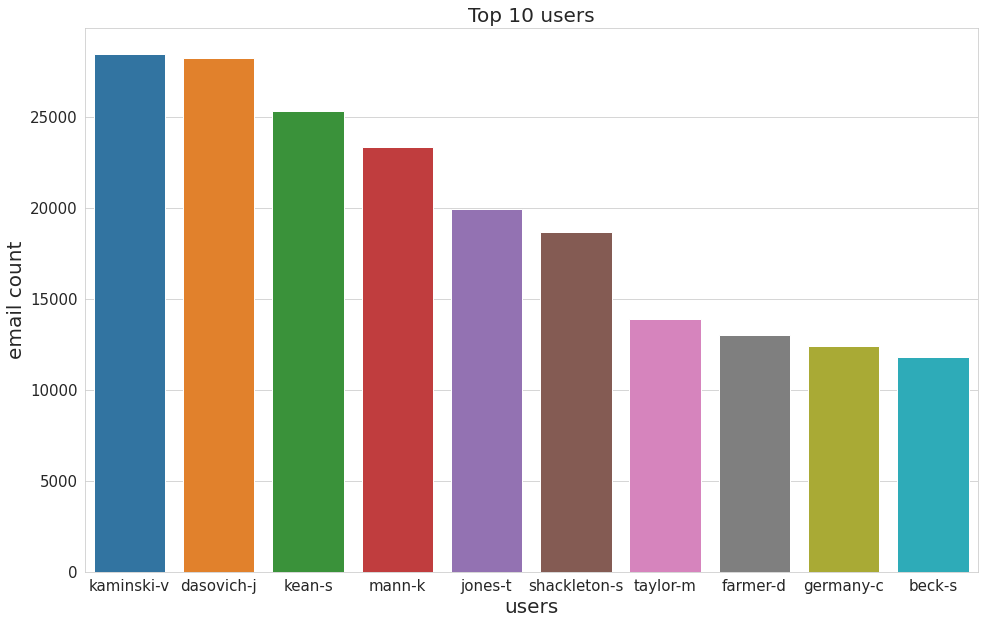

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

ax = sns.barplot(x=top_users.index , y=top_users)
ax.axes.set_title("Top 10 users",fontsize=20)
ax.set_xlabel("users",fontsize=20)
ax.set_ylabel("email count",fontsize=20)

sns.set(style="whitegrid")
ax.tick_params(labelsize=15)
plt.savefig('/content/drive/My Drive/top10.png')
plt.show()

Top 10 email senders

In [ ]:
top_senders = emails_df.groupby('From').count()['file'].sort_values(ascending=False)[:10]

In [ ]:
emails_df['Date'] = pd.to_datetime(emails_df['Date'], utc=True)
#emails_df['Date'] = pd.to_datetime(emails_df['Date'] ,errors = 'coerce', format = '%Y-%m-%dT%H:%M:%S.%f%z', infer_datetime_format = True, cache = True)

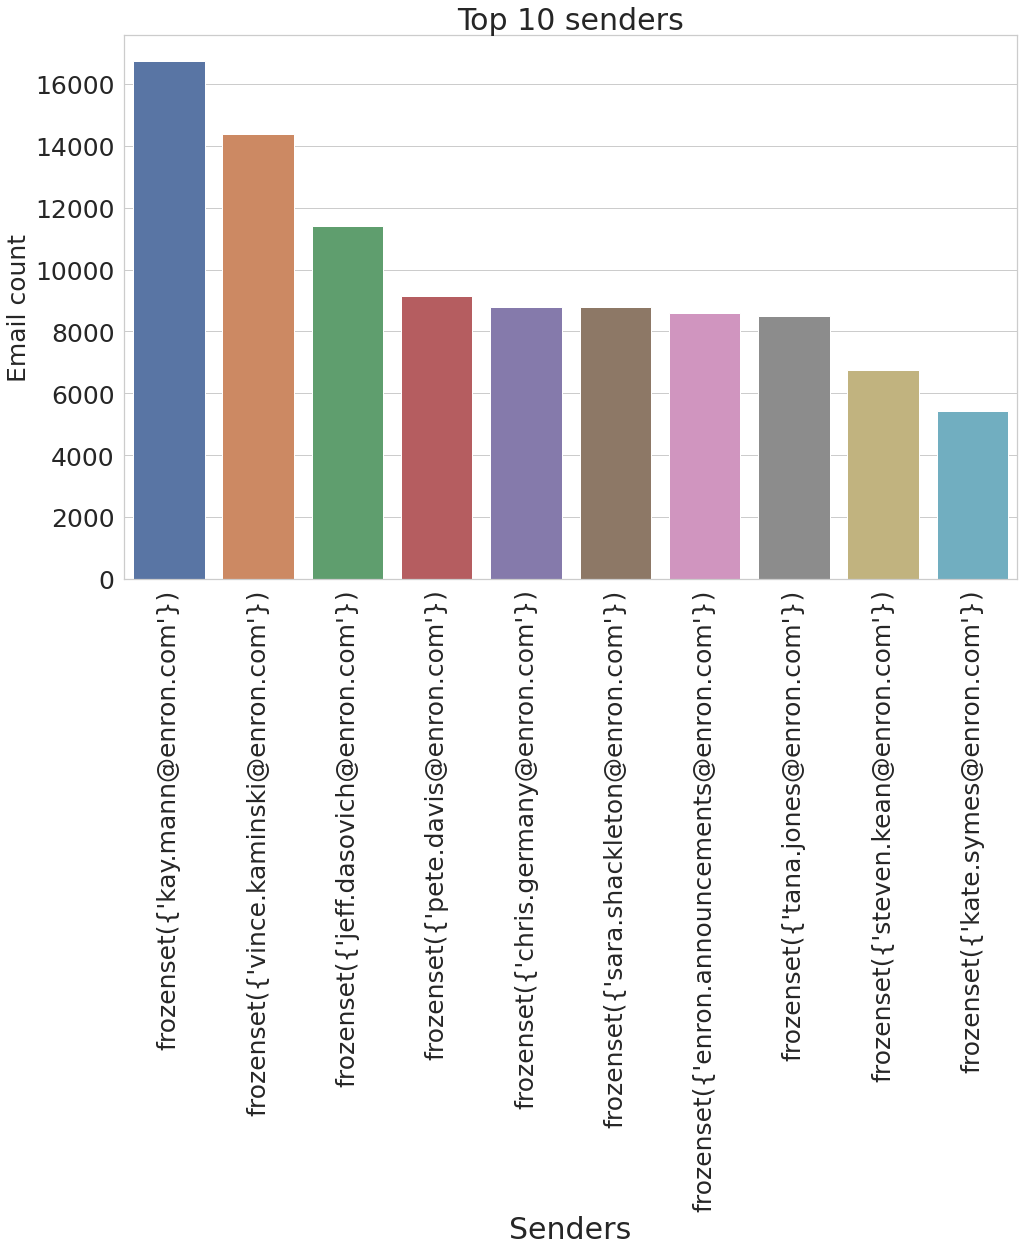

In [ ]:
plt.figure(figsize=(16, 10))

ax = sns.barplot(x=top_senders.index , y=top_senders)
ax.axes.set_title("Top 10 senders",fontsize=30)
ax.set_xlabel("Senders",fontsize=30)
ax.set_ylabel("Email count",fontsize=25)

sns.set(style="whitegrid")
ax.tick_params(axis = 'x', labelsize=25, labelrotation = 90)
ax.tick_params(axis = 'y', labelsize=25)
plt.savefig('/content/drive/My Drive/top10senders.png')
plt.show()


# Top 10 email receivers

In [ ]:
top_receivers = emails_df.groupby('To').count()['file'].sort_values(ascending=False)[:10]

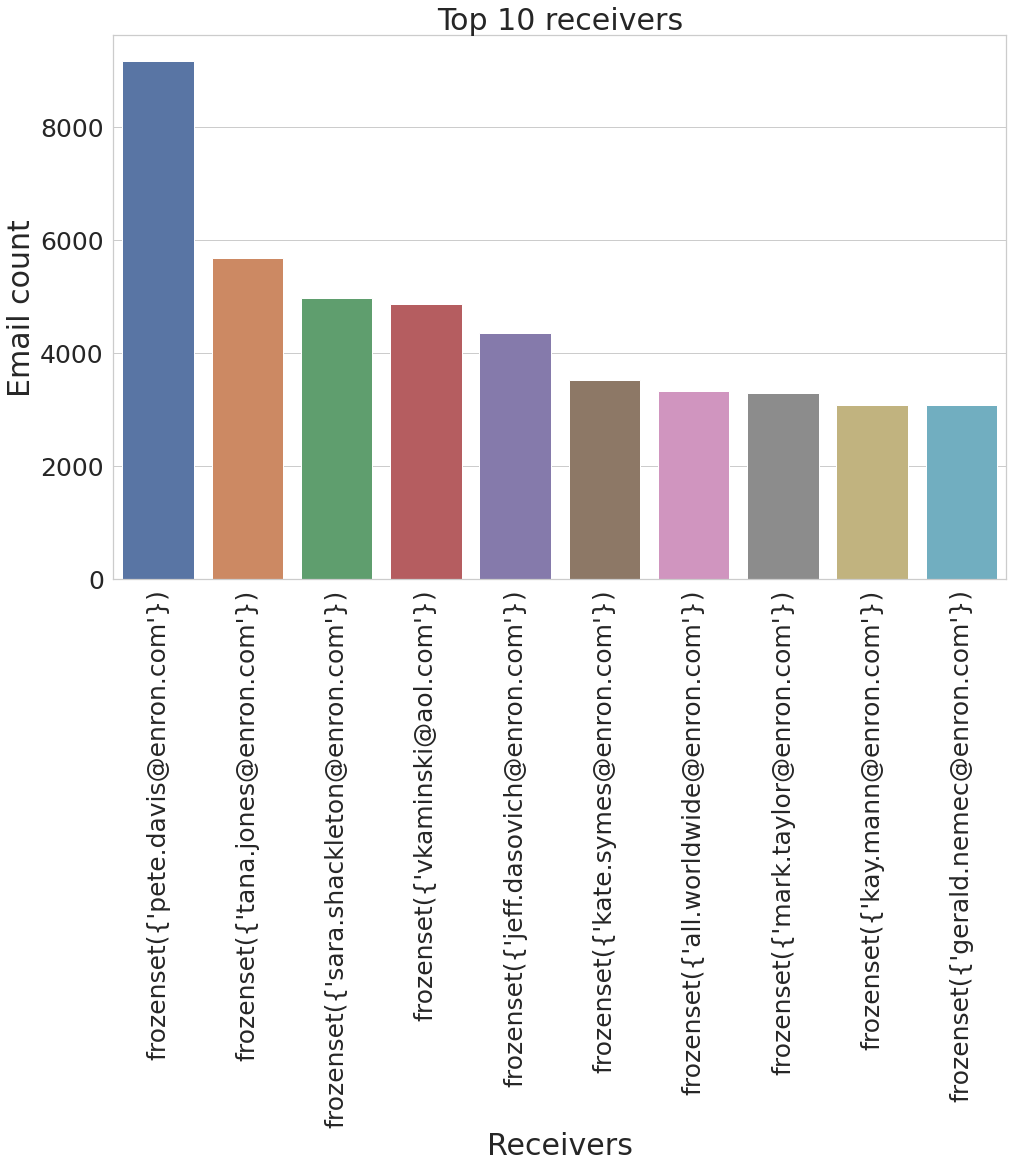

In [ ]:
plt.figure(figsize=(16, 10))

ax = sns.barplot(x=top_receivers.index , y=top_receivers)
ax.axes.set_title("Top 10 receivers",fontsize=30)
ax.set_xlabel("Receivers",fontsize=30)
ax.set_ylabel("Email count",fontsize=30)

sns.set(style="whitegrid")
ax.tick_params(axis = 'x', labelsize=25, labelrotation = 90)
ax.tick_params(axis = 'y', labelsize=25)
plt.savefig('/content/drive/My Drive/top10receivers.png')
plt.show()

# Top 10 most frequent conversation

In [ ]:
TestFrame2 = emails_df[['From', 'To', 'Date']].dropna()
TestFrame2 = TestFrame2.groupby(['From', 'To']).count().reset_index()
# rename column
TestFrame2.rename(columns={'Date': 'count'}, inplace=True)
print(TestFrame2.sort_values(by=['count'], ascending=False)[:10])

                                  From                            To  count
18151           (pete.davis@enron.com)        (pete.davis@enron.com)   9141
69039       (vince.kaminski@enron.com)           (vkaminski@aol.com)   4308
46010  (enron.announcements@enron.com)     (all.worldwide@enron.com)   2206
45998  (enron.announcements@enron.com)       (all.houston@enron.com)   1701
35593             (kay.mann@enron.com)     (suzanne.adams@enron.com)   1528
69033       (vince.kaminski@enron.com)  (shirley.crenshaw@enron.com)   1190
29443          (steven.kean@enron.com)  (maureen.mcvicker@enron.com)   1014
35001             (kay.mann@enron.com)              (nmann@erac.com)    980
90024           (kate.symes@enron.com)    (evelyn.metoyer@enron.com)    915
90031           (kate.symes@enron.com)    (kerri.thompson@enron.com)    859


# Splitting emails by year

# Word Cloud For Email Subject

(-0.5, 799.5, 599.5, -0.5)

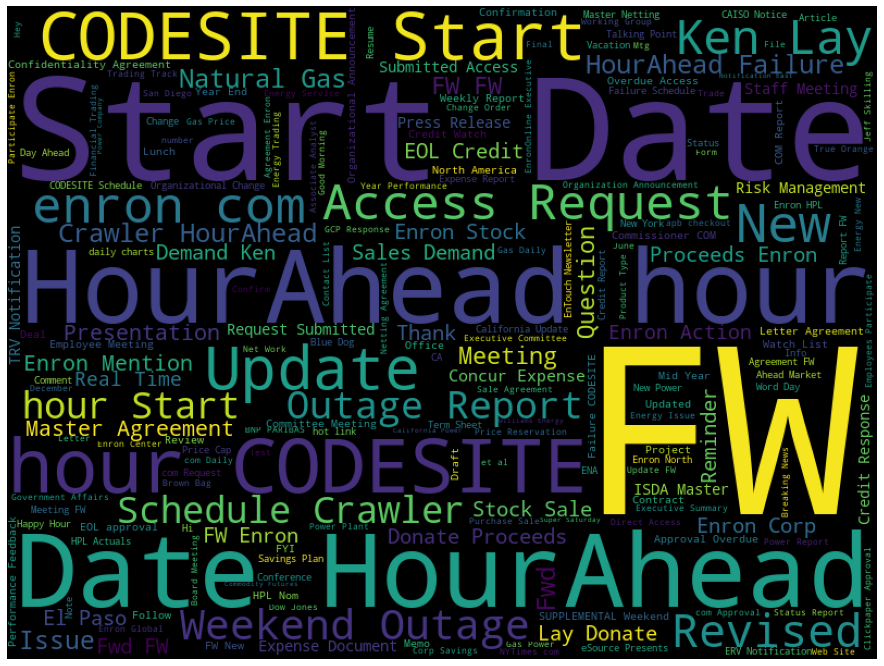

In [ ]:
subjects = ' '.join(map(str, emails_df['Subject'].dropna()))
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=ENGLISH_STOP_WORDS).generate(subjects)
ax.imshow(wc)
ax.axis("off")



# Word Cloud for Email Content

(-0.5, 799.5, 599.5, -0.5)

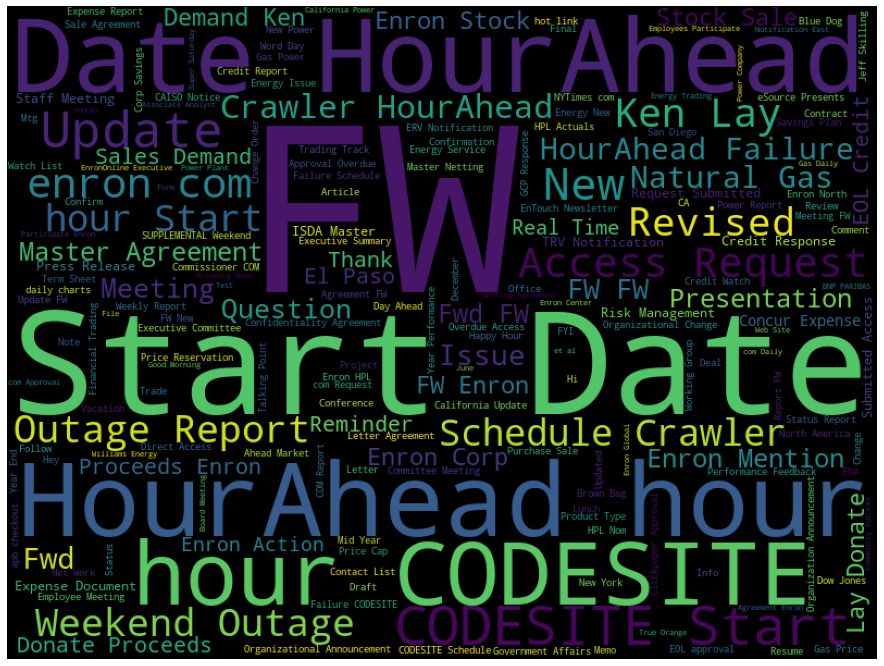

In [ ]:
content = ' '.join(map(str, emails_df['content']))
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=ENGLISH_STOP_WORDS).generate(subjects)
ax.imshow(wc)
ax.axis("off")

# Update the stop word and check Again

(-0.5, 799.5, 599.5, -0.5)

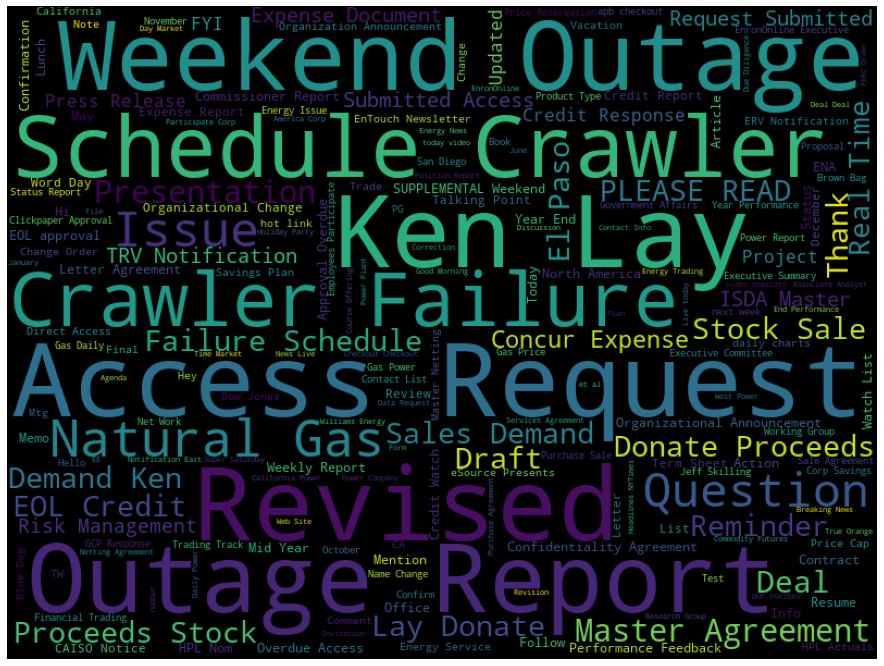

In [ ]:
# Uodate the stop word and check again

subjects = ' '.join(map(str, emails_df['Subject'].dropna()))
fig, ax = plt.subplots(figsize=(16, 12))

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','FW','Date','Update','CODESITE','New','Fwd','meeting','Start','Date','Hour','Ahead','Start','enron','com','hour','HourAhead','Conference Call','Conference', 'Call'])

wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=stop_words).generate(subjects)
ax.imshow(wc)
ax.axis("off")


(-0.5, 799.5, 599.5, -0.5)

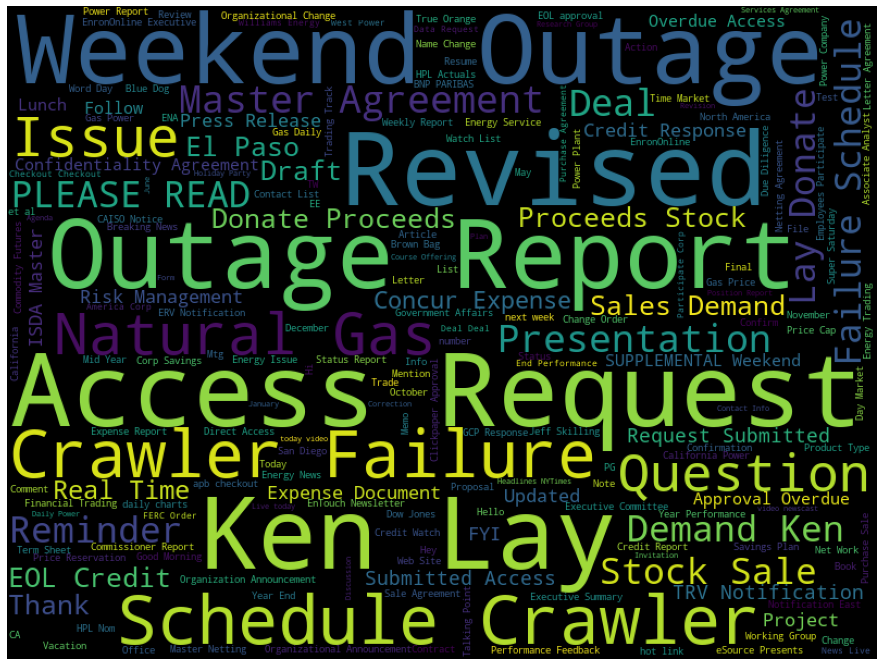

In [ ]:
# Word count dated for Content

content = ' '.join(map(str, emails_df['content']))
fig, ax = plt.subplots(figsize=(16, 12))

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','FW','Date','Update','CODESITE','New','Fwd','meeting','Start','Date','Hour','Ahead','Start','enron','com','hour','HourAhead','Conference Call','Conference', 'Call'])

wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=stop_words).generate(subjects)
ax.imshow(wc)
ax.axis("off")

# Top 10 who received mails from outside of Enron

In [ ]:
non_enron_emails = emails_df[["To","Date","From"]]

In [ ]:
non_enron_emails['To'] = non_enron_emails['To'].astype(str)

In [ ]:
non_enron_emails = non_enron_emails[non_enron_emails["To"] != '@enron.com']      # df[~df['name'].str.contains('tom')]

In [ ]:
non_enron_emails.shape

(517401, 3)

In [ ]:
non_enron_emails.head(2)

,To,Date,From
0,(tim.belden@enron.com),"Mon, 14 May 2001 16:39:00 -0700 (PDT)",(phillip.allen@enron.com)
1,(john.lavorato@enron.com),"Fri, 4 May 2001 13:51:00 -0700 (PDT)",(phillip.allen@enron.com)


In [ ]:
non_enron_emails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517401 entries, 0 to 517400
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   To      495554 non-null  object
 1   Date    517401 non-null  object
 2   From    517401 non-null  object
dtypes: object(3)
memory usage: 15.8+ MB


In [ ]:
def listifyString(element):
  return element.strip('][\'').split(',')

In [ ]:
emails_df["To","From"].astype(str)

KeyError: ignored

In [ ]:
ftd = dataset[['From', 'To', 'Date']].dropna()
ftd = ftd.loc[ftd['To'].map(listifyString).map(len) == 1]
ftd = ftd.loc[ftd['To'] != ftd['From']]
ftd = ftd.groupby(['From', 'To']).count().reset_index()

# rename column
ftd.rename(columns={'Date': 'count'}, inplace=True)
ftd.sort_values('count', ascending=False).head(10)

NameError: ignored

In [ ]:
def listifyString(element):
  return element.str.strip('][\'').split(',')

def fromOutsideEnron(element):
  return element[0].endswith('@enron.com')

In [ ]:
sub_df = emails_df[['From', 'To']].dropna()
sub_df = sub_df[~sub_df['From'].map(listifyString).map(fromOutsideEnron)]

sub_df = sub_df.loc[sub_df['To'].map(listifyString).map(len) == 1]

sub_df = sub_df.groupby(['To']).count().reset_index()

sub_df.rename(columns={'From': 'count'}, inplace=True)
td = sub_df.sort_values('count', ascending=False).head(10)

AttributeError: ignored

In [ ]:
#td = sub_df.['filename'].sort_values(ascending=False)[:10]#sort_values('count', ascending=False).head(10)
plt.figure(figsize=(16, 10))

ax = sns.barplot(x=td['To'] , y=td['count'], palette="Blues_d")
ax.axes.set_title("Top 10 receivers receiving email from outside Enron",fontsize=30)
ax.set_xlabel("Receivers",fontsize=30)
ax.set_ylabel("Email count",fontsize=30)

sns.set(style="whitegrid")
ax.tick_params(axis = 'x', labelsize=25, labelrotation = 90)
ax.tick_params(axis = 'y', labelsize=25)
plt.savefig('/content/drive/My Drive/ALDA-Project/top10receiversfromoutside.png')
plt.show()

NameError: ignored

<Figure size 1152x720 with 0 Axes>